**EDA, Visualization, Data Preparation for Yellow cab taxi ride dataset**


In [1]:
import pandas as pd

# Load the datasets
yellow_tripdata_path = '/content/yellow_tripdata_2020-06.csv'
climate_data_path = '/content/climate.xlsx'

# Load the yellow_tripdata CSV file
yellow_tripdata = pd.read_csv(yellow_tripdata_path)

# Load the climate data Excel file
climate_data = pd.read_excel(climate_data_path)

# Display basic information and the first few rows of each dataset to understand their structure
yellow_tripdata_info = yellow_tripdata.info()
yellow_tripdata_head = yellow_tripdata.head()

climate_data_info = climate_data.info()
climate_data_head = climate_data.head()

yellow_tripdata_info, yellow_tripdata_head, climate_data_info, climate_data_head

<ipython-input-1-ab96beb2354e>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  yellow_tripdata = pd.read_csv(yellow_tripdata_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549760 entries, 0 to 549759
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               499043 non-null  float64
 1   tpep_pickup_datetime   549760 non-null  object 
 2   tpep_dropoff_datetime  549760 non-null  object 
 3   passenger_count        499043 non-null  float64
 4   trip_distance          549760 non-null  float64
 5   RatecodeID             499043 non-null  float64
 6   store_and_fwd_flag     499043 non-null  object 
 7   PULocationID           549760 non-null  int64  
 8   DOLocationID           549760 non-null  int64  
 9   payment_type           499043 non-null  float64
 10  fare_amount            549760 non-null  float64
 11  extra                  549760 non-null  float64
 12  mta_tax                549760 non-null  float64
 13  tip_amount             549760 non-null  float64
 14  tolls_amount           549760 non-nu

(None,
    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
 0       1.0  2020-06-01 00:31:23   2020-06-01 00:49:58              1.0   
 1       1.0  2020-06-01 00:42:50   2020-06-01 01:04:33              1.0   
 2       1.0  2020-06-01 00:39:51   2020-06-01 00:49:09              1.0   
 3       1.0  2020-06-01 00:56:13   2020-06-01 01:11:38              1.0   
 4       1.0  2020-06-01 00:16:41   2020-06-01 00:29:30              1.0   
 
    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
 0            3.6         1.0                  N           140            68   
 1            5.6         1.0                  N            79           226   
 2            2.3         1.0                  N           238           116   
 3            5.3         1.0                  N           141           116   
 4            4.4         1.0                  N           186            75   
 
    payment_type  fare_amount  extra  mta_tax  tip_am

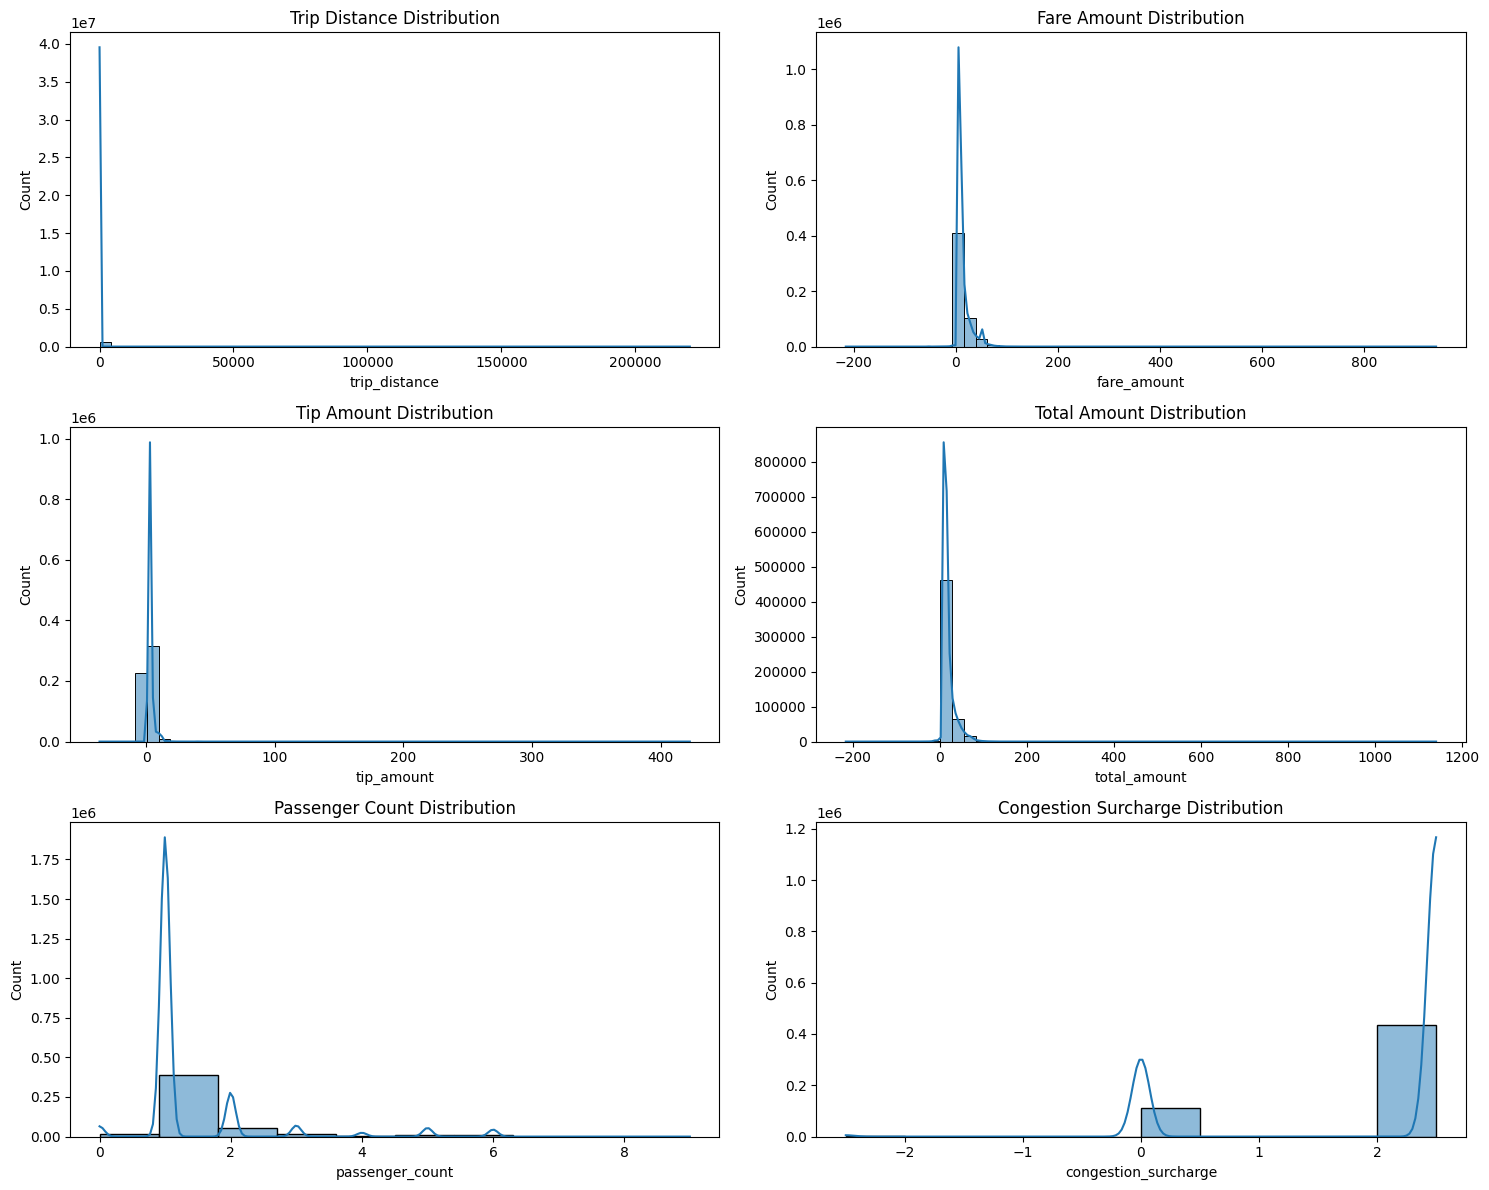

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,499043.000000,499043.000000,549760.000000,499043.000000,549760.000000,549760.000000,499043.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000,549760.000000
mean,1.598351,1.356148,4.104275,1.047214,157.636474,153.473989,1.373327,13.606734,1.023772,0.491298,1.762904,0.367066,0.296980,18.768912,1.967681
std,0.490232,1.016665,336.024280,1.095790,69.756787,73.842217,0.531616,13.521364,1.263818,0.080832,2.631495,1.751982,0.041437,15.178965,1.044792
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-216.000000,-4.500000,-0.500000,-36.300000,-28.750000,-0.300000,-216.300000,-2.500000
25%,1.000000,1.000000,1.010000,1.000000,107.000000,87.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.700000,2.500000
50%,2.000000,1.000000,1.860000,1.000000,151.000000,151.000000,1.000000,9.000000,0.500000,0.500000,1.500000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,1.000000,3.660000,1.000000,234.000000,233.000000,2.000000,15.500000,2.500000,0.500000,2.750000,0.000000,0.300000,20.800000,2.500000
max,2.000000,9.000000,220386.230000,99.000000,265.000000,265.000000,5.000000,941.500000,87.560000,3.300000,422.680000,114.750000,0.300000,1141.100000,2.500000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported

# Assuming yellow_tripdata is the DataFrame you want to analyze
# Replace 'yellow_tripdata' with the correct DataFrame name if different
data = yellow_tripdata

# Set up the plotting environment
plt.style.use('default')

# Summary statistics for numerical features
numerical_summary = data.describe()

# Visualizing distributions for key numerical columns
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
sns.histplot(data['trip_distance'], bins=50, kde=True, ax=axs[0, 0]).set(title='Trip Distance Distribution')
sns.histplot(data['fare_amount'], bins=50, kde=True, ax=axs[0, 1]).set(title='Fare Amount Distribution')
sns.histplot(data['tip_amount'], bins=50, kde=True, ax=axs[1, 0]).set(title='Tip Amount Distribution')
sns.histplot(data['total_amount'], bins=50, kde=True, ax=axs[1, 1]).set(title='Total Amount Distribution')
sns.histplot(data['passenger_count'], bins=10, kde=True, ax=axs[2, 0]).set(title='Passenger Count Distribution')
sns.histplot(data['congestion_surcharge'], bins=10, kde=True, ax=axs[2, 1]).set(title='Congestion Surcharge Distribution')

plt.tight_layout()
plt.show()

numerical_summary

In [4]:
# Convert datetime columns to datetime type
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')

# Replace negative values in numerical columns with NaN to mark them as missing for imputation
cols_with_negatives = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']
data[cols_with_negatives] = data[cols_with_negatives].applymap(lambda x: x if x >= 0 else None)

# Display the number of missing values per column after replacing anomalies
missing_values = data.isnull().sum()

# Impute missing values based on column characteristics
# For example, 'passenger_count' might use median, while fare-related fields could use mean or a more sophisticated imputation
data['passenger_count'].fillna(data['passenger_count'].median(), inplace=True)
data['fare_amount'].fillna(data['fare_amount'].mean(), inplace=True)
data['extra'].fillna(data['extra'].median(), inplace=True)
data['mta_tax'].fillna(data['mta_tax'].median(), inplace=True)
data['tip_amount'].fillna(data['tip_amount'].median(), inplace=True)
data['tolls_amount'].fillna(data['tolls_amount'].median(), inplace=True)
data['total_amount'].fillna(data['total_amount'].mean(), inplace=True)
data['congestion_surcharge'].fillna(data['congestion_surcharge'].median(), inplace=True)

# After imputation, recheck for any remaining missing values
remaining_missing_values = data.isnull().sum()

missing_values, remaining_missing_values


<ipython-input-4-a70ead7c0a4b>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[cols_with_negatives] = data[cols_with_negatives].applymap(lambda x: x if x >= 0 else None)
<ipython-input-4-a70ead7c0a4b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(data['passenger_count'].median(), inplace=True)
<ipython-input-4-a70ead7c0a4b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace m

(VendorID                 50717
 tpep_pickup_datetime         0
 tpep_dropoff_datetime        0
 passenger_count          50717
 trip_distance                0
 RatecodeID               50717
 store_and_fwd_flag       50717
 PULocationID                 0
 DOLocationID                 0
 payment_type             50717
 fare_amount               2544
 extra                     1043
 mta_tax                   2465
 tip_amount                  33
 tolls_amount                50
 improvement_surcharge        0
 total_amount              2531
 congestion_surcharge      1942
 dtype: int64,
 VendorID                 50717
 tpep_pickup_datetime         0
 tpep_dropoff_datetime        0
 passenger_count              0
 trip_distance                0
 RatecodeID               50717
 store_and_fwd_flag       50717
 PULocationID                 0
 DOLocationID                 0
 payment_type             50717
 fare_amount                  0
 extra                        0
 mta_tax                 

**EDA, Visualization, Data Preparation for historical climate data**

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/climate.xlsx'
data = pd.read_excel(file_path)

# Display basic information and the first few rows of the dataset to understand its structure
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           60 non-null     int64  
 1   precipitation  60 non-null     float64
 2   meantemp       60 non-null     float64
 3   mintemp        60 non-null     float64
 4   maxtemp        60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


(None,
    Year  precipitation  meantemp  mintemp  maxtemp
 0  1961        1175.75     24.13     7.12    39.83
 1  1962        1117.62     24.10     7.10    39.73
 2  1963        1185.62     23.91     6.58    39.55
 3  1964        1150.77     23.85     6.90    39.52
 4  1965        1111.10     23.96     6.91    39.59)

,Year,precipitation,meantemp,mintemp,maxtemp
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1990.500000,1148.055833,24.262833,7.208333,39.854333
std,17.464249,37.913196,0.251646,0.356438,0.285042
min,1961.000000,1040.180000,23.850000,6.580000,39.120000
25%,1975.750000,1124.017500,24.067500,6.942500,39.665000
50%,1990.500000,1151.010000,24.215000,7.125000,39.810000
75%,2005.250000,1177.000000,24.500000,7.465000,40.040000
max,2020.000000,1214.110000,24.730000,8.050000,40.530000


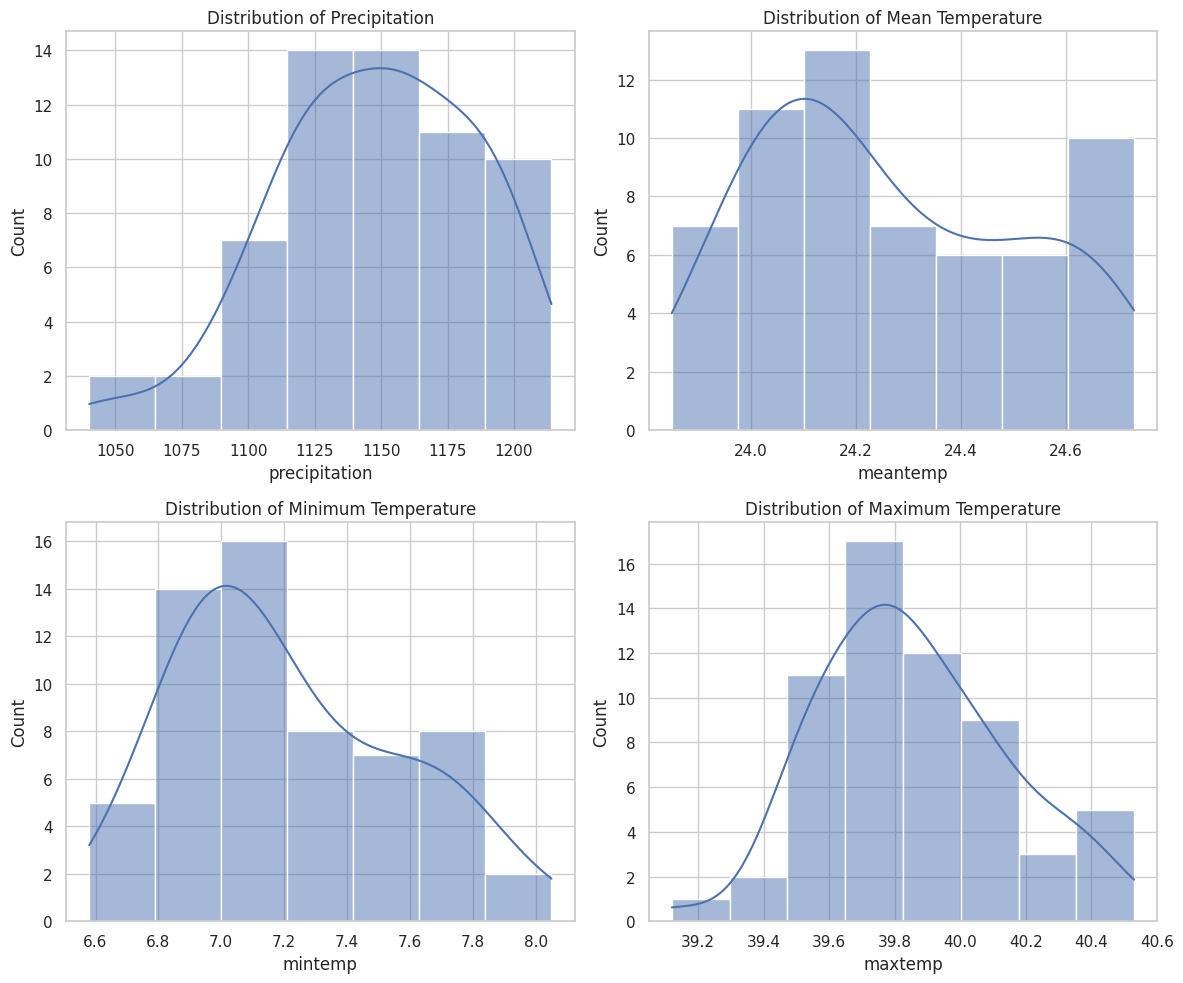

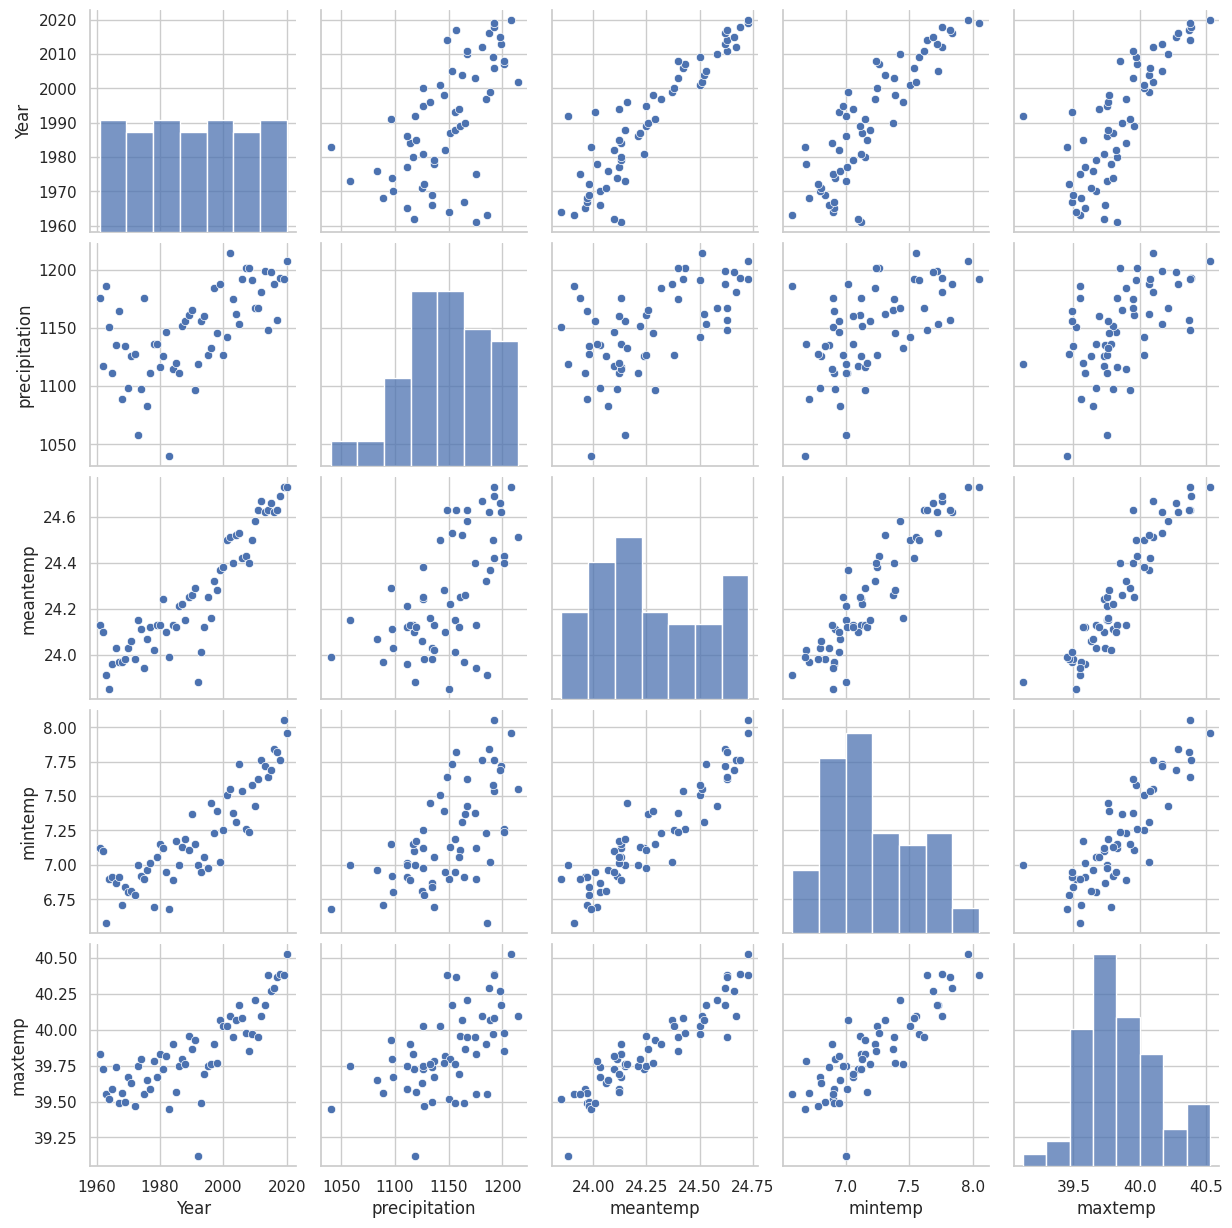

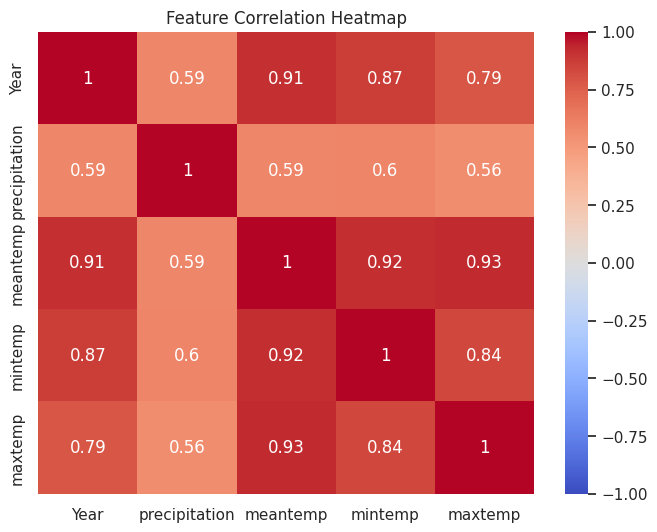

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization aesthetics
sns.set(style="whitegrid")

# Summary statistics for numeric columns
data_description = data.describe()

# Plotting distributions and pair plots to check relationships and detect any outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['precipitation'], kde=True, ax=axes[0, 0]).set_title('Distribution of Precipitation')
sns.histplot(data['meantemp'], kde=True, ax=axes[0, 1]).set_title('Distribution of Mean Temperature')
sns.histplot(data['mintemp'], kde=True, ax=axes[1, 0]).set_title('Distribution of Minimum Temperature')
sns.histplot(data['maxtemp'], kde=True, ax=axes[1, 1]).set_title('Distribution of Maximum Temperature')

plt.tight_layout()

# Pair plot to observe relationships between the features
sns.pairplot(data)

# Correlation heatmap to assess feature relationships
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1).set_title("Feature Correlation Heatmap")

data_description


In [8]:
!pip install ace-tools

<ipython-input-11-0565c3456166>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data['cluster'] = kmeans.fit_predict(normal_data[['precipitation', 'meantemp', 'mintemp', 'maxtemp']])


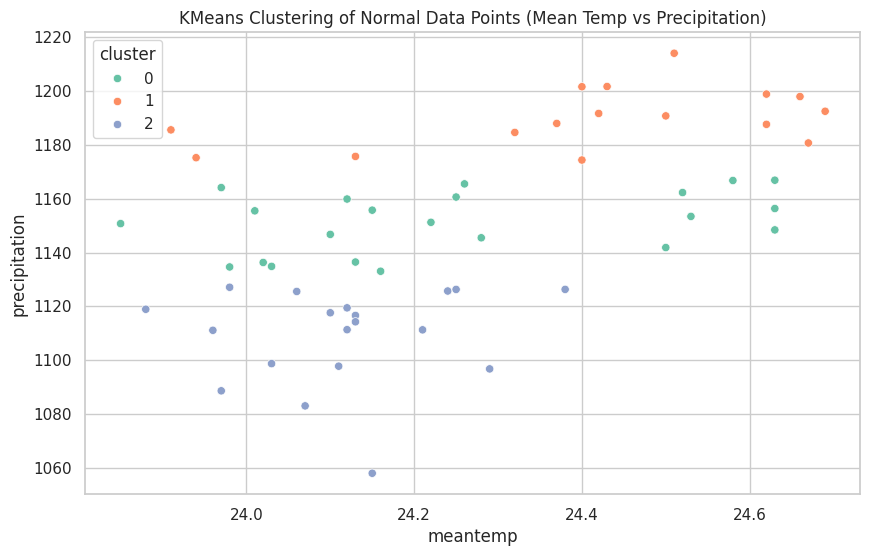

Processed Climate Data:
    Year  precipitation  meantemp  mintemp  maxtemp  anomaly  cluster
0   1961        1175.75     24.13     7.12    39.83        1        1
1   1962        1117.62     24.10     7.10    39.73        1        2
2   1963        1185.62     23.91     6.58    39.55        1        1
3   1964        1150.77     23.85     6.90    39.52        1        0
4   1965        1111.10     23.96     6.91    39.59        1        2
5   1966        1134.87     24.03     6.87    39.74        1        0
6   1967        1164.16     23.97     6.91    39.49        1        0
7   1968        1088.60     23.97     6.71    39.56        1        2
8   1969        1134.65     23.98     6.84    39.50        1        0
9   1970        1098.71     24.03     6.80    39.67        1        2
10  1971        1125.54     24.06     6.81    39.63        1        2
11  1972        1127.10     23.98     6.78    39.47        1        2
12  1973        1057.95     24.15     7.00    39.75        1      

<ipython-input-11-0565c3456166>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data.drop(columns=['anomaly'], inplace=True)  # Remove anomaly column for clean dataset


,Year,precipitation,meantemp,mintemp,maxtemp,cluster
0,1961,1175.75,24.13,7.12,39.83,1
1,1962,1117.62,24.10,7.10,39.73,2
2,1963,1185.62,23.91,6.58,39.55,1
3,1964,1150.77,23.85,6.90,39.52,0
4,1965,1111.10,23.96,6.91,39.59,2


In [11]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import pandas as pd # Import pandas to use its display functions

# Detect anomalies using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['precipitation', 'meantemp', 'mintemp', 'maxtemp']])

# Separate the data into normal and anomalous instances
normal_data = data[data['anomaly'] == 1]
anomalous_data = data[data['anomaly'] == -1]

# Cluster the normal data using KMeans to identify patterns or groups
kmeans = KMeans(n_clusters=3, random_state=42)
normal_data['cluster'] = kmeans.fit_predict(normal_data[['precipitation', 'meantemp', 'mintemp', 'maxtemp']])

# Visualize clustering results for normal data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normal_data, x='meantemp', y='precipitation', hue='cluster', palette='Set2')
plt.title('KMeans Clustering of Normal Data Points (Mean Temp vs Precipitation)')
plt.show()

# Display the processed data using pandas' display function
# Instead of ace_tools, we will use pandas' to_string() for cleaner DataFrame display.
print("Processed Climate Data:") # Label to replace the previous name parameter
print(pd.DataFrame(normal_data).to_string())
# If your dataframe is very large, you can use .head() for a summarized display.

normal_data.drop(columns=['anomaly'], inplace=True)  # Remove anomaly column for clean dataset

normal_data.head()